Template Matching

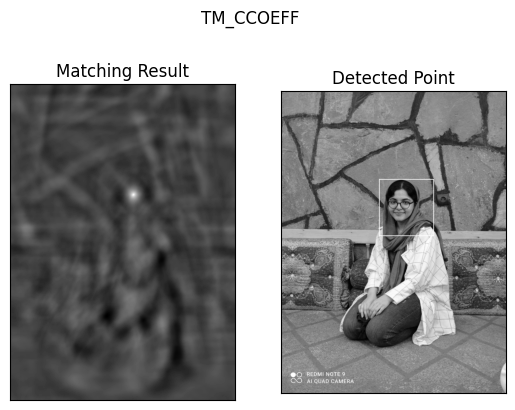

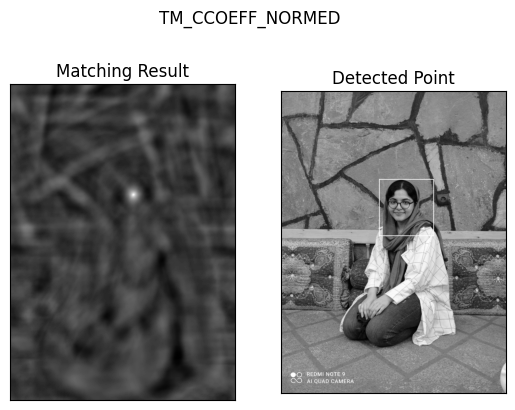

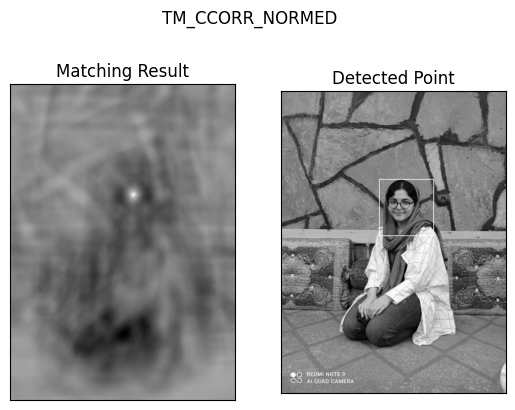

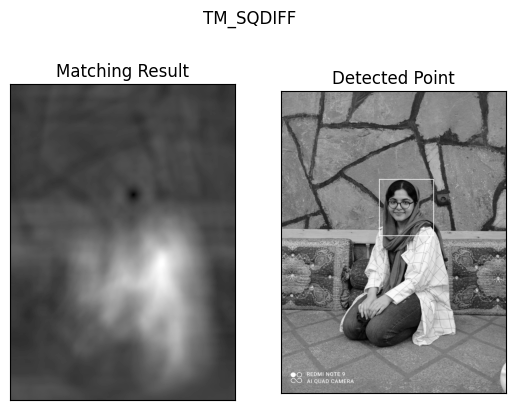

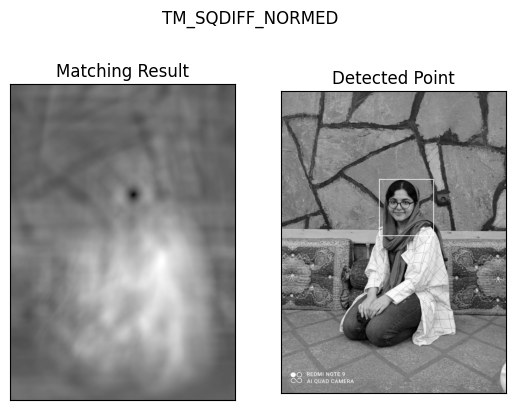

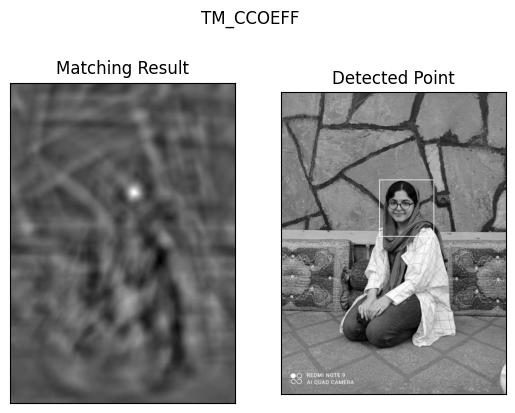

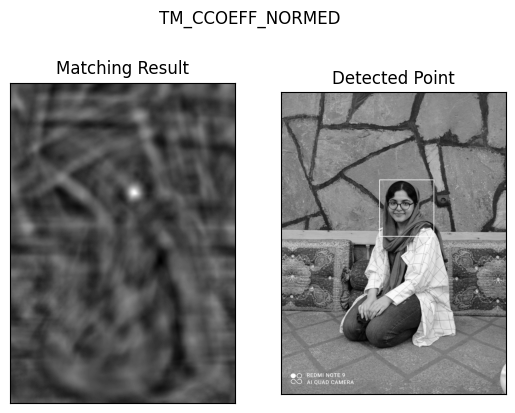

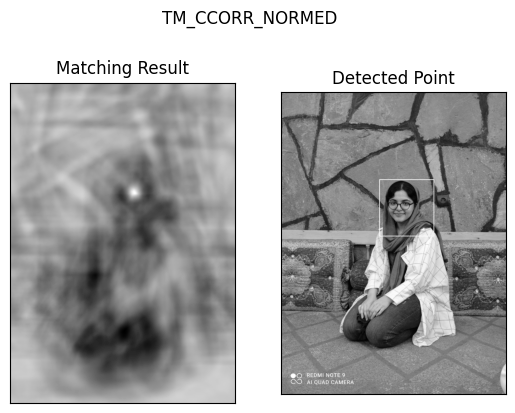

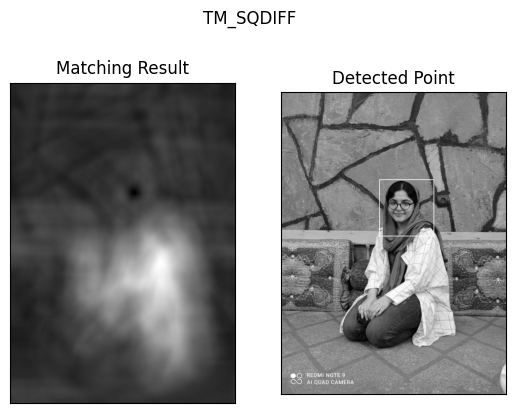

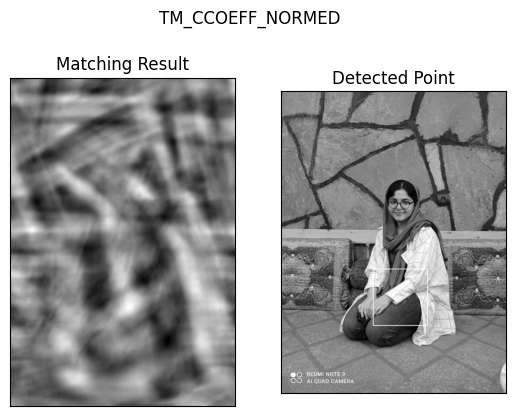

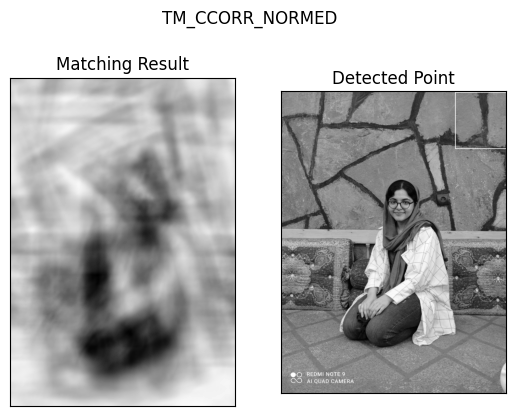

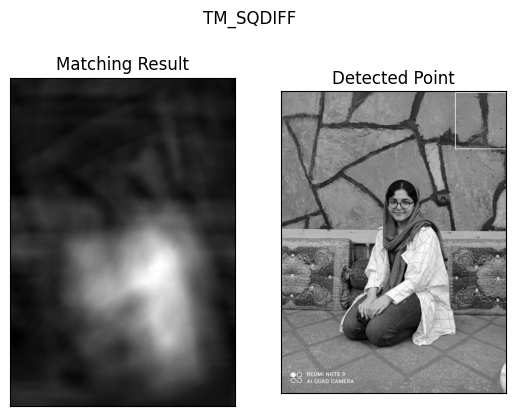

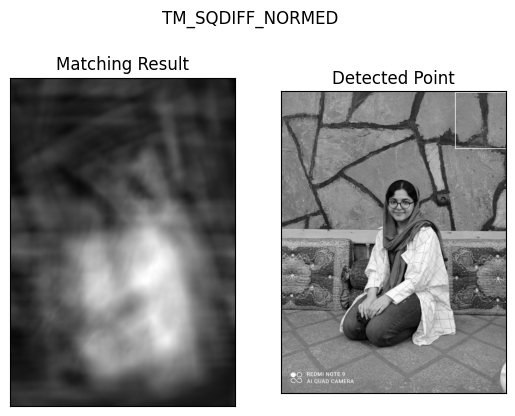

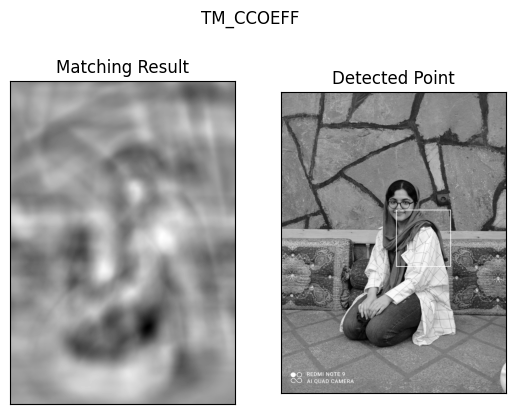

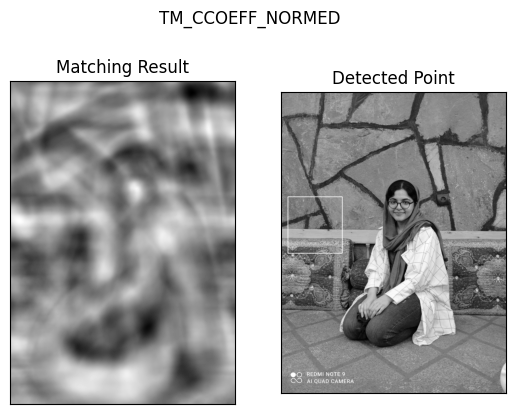

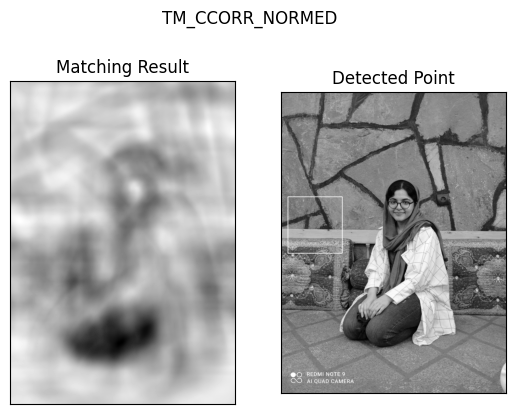

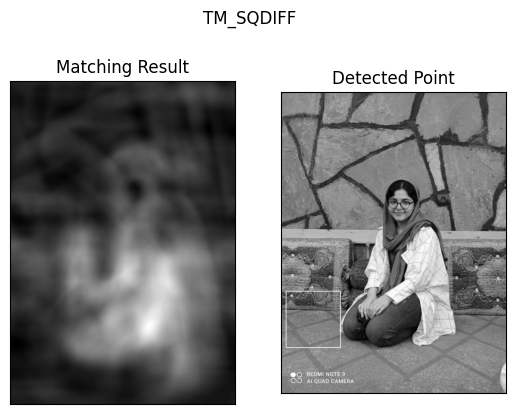

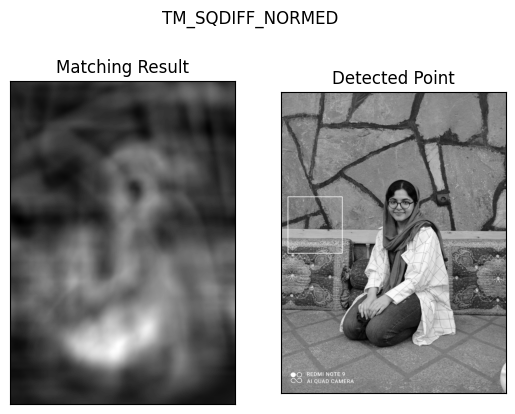

In [11]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
 
img = cv.imread('1.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
img2 = img.copy()

templates = []
template1 = cv.imread('2.jpg', cv.IMREAD_GRAYSCALE)
assert template1 is not None, "file could not be read, check with os.path.exists()"
w, h = template1.shape[::-1]
templates.append(template1)

template2 = cv.imread('32.jpg', cv.IMREAD_GRAYSCALE)
assert template2 is not None, "file could not be read, check with os.path.exists()"
w, h = template2.shape[::-1]
templates.append(template2)
 
template3 = cv.imread('3.jpg', cv.IMREAD_GRAYSCALE)
assert template3 is not None, "file could not be read, check with os.path.exists()"
w, h = template3.shape[::-1]
templates.append(template3)

template4 = cv.imread('4.jpg', cv.IMREAD_GRAYSCALE)
assert template4 is not None, "file could not be read, check with os.path.exists()"
w, h = template4.shape[::-1]
templates.append(template4)

# methods = ['TM_CCOEFF']
methods = ['TM_CCOEFF', 'TM_CCOEFF_NORMED', 'TM_CCORR_NORMED', 'TM_SQDIFF', 'TM_SQDIFF_NORMED']

for template in templates:
    for meth in methods:
        img = img2.copy()
        method = getattr(cv, meth) 
        res = cv.matchTemplate(img,template,method)
        min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
    
        if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
            top_left = min_loc
        else:
            top_left = max_loc
        bottom_right = (top_left[0] + w, top_left[1] + h)
    
        cv.rectangle(img,top_left, bottom_right, 255, 2)
    
        plt.subplot(121),plt.imshow(res,cmap = 'gray')
        plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
        plt.subplot(122),plt.imshow(img,cmap = 'gray')
        plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
        plt.suptitle(meth)

        plt.show()

In [ ]:
import cv2
import numpy as np

source_image = cv2.imread('1.jpg', cv2.IMREAD_GRAYSCALE)
template_image = cv2.imread('3.jpg', cv2.IMREAD_GRAYSCALE)

w, h = template_image.shape[::-1]
result = cv2.matchTemplate(source_image, template_image, cv2.TM_CCOEFF_NORMED)
threshold = 0.8
locations = np.where(result >= threshold)

for pt in zip(*locations[::-1]):
    cv2.rectangle(source_image, pt, (pt[0] + w, pt[1] + h), (255, 0, 0), 2)

cv.imwrite("template.jpg", source_image)

True

Report:
The approach I used is a simple histogram matching and as can be seen, it does not function well for the case with mask and failed to detect it.
However, it performed well and detected the other 2 cases successfully.